In [1]:
# We would try to keep this notebook short and simple and would avoid unecessary
# models and stuff we would work on cross-validation, and cloning,
# some topics like pipelines and custom transformers are not very clear to me from the 
# previous topic so it's better to focus on the ones i am able to understand,
# pipelines and rest complicated stuff i would understand when revising chapter 2, for now focus on simple MNIST

#Lets import the important libraries
from sklearn.datasets import fetch_openml #for the mnist dataset
import numpy as np #numpy for arrays
import matplotlib.pyplot as plt #for graphs and other plots
from sklearn.model_selection import cross_val_score, cross_val_predict #helps in cross validation 
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix #calculating the confusion matrix
from sklearn.linear_model import SGDClassifier #Stochastic gradient classifier

In [2]:
#Getting the data from open_ml and splitting it into training and testing data
MNIST=fetch_openml('mnist_784', version=1)
X=MNIST['data']
y=MNIST['target']
X_train, X_test, y_train, y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [14]:
#I think it would be better if we scale all the values from 0 to 1
for i in range(len(X)):
    X[i]/=256

In [18]:
#We would be using an sgd_clf
sgd_clf=SGDClassifier(random_state=21)
y_train_pred=cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [22]:
#Here we would create a confusion matrix
cm=confusion_matrix(y_train, y_train_pred)


[[5709    2   53    8    8   33   52    6   45    7]
 [   1 6522   62   12    7   28   11    9   73   17]
 [  40   48 5371   84   58   19  104   65  150   19]
 [  26   32  269 5282   10  185   31   48  177   71]
 [  15   24   47   10 5317    7   66   15   73  268]
 [  54   24   79  211   65 4535  109   18  243   83]
 [  40   12   75    3   34   88 5623    3   37    3]
 [  23   22  150   30   65   20   10 5591   33  321]
 [  47  129  106  157   45  129   57   15 5075   91]
 [  32   22   40  102  166   55    3  144  119 5266]]
0.90485


In [24]:
#Lets fit the data into the classifier then after that we could work with decision function and other stuff
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=21)

In [30]:
#Let's see if the decision function works
y_score=sgd_clf.decision_function([X[0]])
print(y_score) #It is working

[[ -7.49840519  -9.17538235  -4.71799143  -0.27965597 -11.38091443
    1.98440035  -7.20181222  -4.7223527   -7.66155849  -7.62214817]]


In [33]:
#We can't plot graphs because its multivariable
#Lets play with random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
y_f_train_pred=cross_val_predict(rf_clf, X_train, y_train, cv=3)

In [108]:
cm_rf=confusion_matrix(y_train, y_f_train_pred)
print(cm_rf)
print(cm_rf.trace()/cm_rf.sum())
#It is much better than sgd_clf

[[5838    1    9    2    6    7   13    1   43    3]
 [   1 6646   36   10   10    4    7   11   10    7]
 [  28   12 5757   26   30    5   20   38   36    6]
 [   8   10   93 5800    3   66    4   48   65   34]
 [  10   12   11    0 5641    1   29   10   18  110]
 [  22    7   12   70   11 5182   45    5   40   27]
 [  25   12    4    0    9   45 5801    0   22    0]
 [   7   24   66    5   40    0    0 6030   13   80]
 [  13   39   34   50   30   47   27    6 5534   71]
 [  22    9   15   70   77   16    3   56   49 5632]]
0.96435


In [109]:
rows_sums=[] #for storing the sums of the row

for i in range(len(cm_rf)):
    rows_sums.append(cm_rf[i].sum())

print(rows_sums)
rows_sums=np.array(rows_sums)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


In [110]:
#Lets divide each row by the sum of each row
norm_cf = np.array(cm_rf, dtype='float')
for x in range(len(norm_cf)):
    norm_cf[x] = norm_cf[x]/rows_sums[x]

np.fill_diagonal(norm_cf, 0)

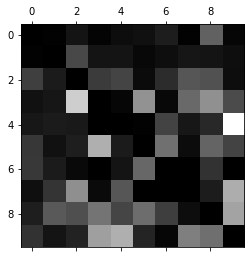

In [111]:
plt.matshow(norm_cf, cmap=plt.cm.gray)